# K Nearest Neighbors

###  Notebook Contents:

1. Import the packages that I need.
2. Read in merged_df from datasets.
3. Set my X and Y variables for train_test_split.
4. Create custom stop words and unionize them with English stopwords.
5. Create pipeline for models.
6. Run KNN model with two transformers.
    - CountVectorizer.
    - TfidfVectorizer.
7. Use best_params_ that will display the best parameters and play with the parameters to get the best possible score.
8. Print out specificty scores using a confusion_matrix.
9. Create a misclassification dataframe.
    - Visualize what rows of data were misclassified.
    - Look for common trends.
10. Create a visualization of the most misclassified words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reading in merged dataframe
merged_df = pd.read_csv('./data/merged_subreddits.csv')
# Setting mergeddataframe to only the columns I want
merged_df = merged_df[['user_post', 'subreddit']]

In [3]:
# Setting X and Y variables

# Set X to user_post column
X = merged_df['user_post']
# Set y to subreddit column
y = merged_df['subreddit']

In [4]:
# The baseline score I will attempt to beat
y.value_counts(normalize=True)

0    0.513568
1    0.486432
Name: subreddit, dtype: float64

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify = y, random_state = 42)

In [6]:
# Creating custom stop words. Made to remove profanity that teenagers like to use!
# Will add the custom stop words with English stop words and test as a paremeter.
my_stops = ['cum', 've', 'don', 'just', 'like', 'filler', '0001', 'know', 'want', 'really', 'good', 
            'going', 'feel', 'got','think', 'https', 'gt', 'com', 'im', 'things', 'talk', 'll', 'amp', 
            'way', 'did', 'day', 'make', 'shit' , 'life', 'said', 'new', 'people', 'fucking', 'say', 'wanna']

# Setting variable stops as a union of English stop words and my custom stop words, my_stops.
stops = text.ENGLISH_STOP_WORDS.union(my_stops)

## Pipeline / KNN / CountVectorizer

In [7]:
# Setting pipeline for cvec
# Using CountVectorizer and KNeighborsClassifier
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Setting parameters for cvec pipe
pipe_params = {
    'cvec__max_features': [1_000, 2_000],
    'cvec__min_df': [4, 5],
    'cvec__max_df': [.75, .80],
    'cvec__ngram_range': [(1,1)],
    'cvec__stop_words' : [None]
}

In [8]:
# Instatiate GridSearch with pipe, paramaters and crossvals as 5
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)

In [9]:
# Fitting training data.
gs.fit(X_train, y_train)

# Finding best parameters from KNN CountVectorizer
gs.best_params_

{'cvec__max_df': 0.75,
 'cvec__max_features': 1000,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [10]:
print("KNN CountVectorizer Score")
print("_________________________________")
# The best score
print("Best Score:", gs.best_score_)
print("")
# Score model on training set
print("Training Score:", gs.score(X_train, y_train))
print("")
# Score model on testing set
print("Testing Score:", gs.score(X_test, y_test))
print("")
# Estimate how your model will perform on unseen data
print("Cross Val Score:", cross_val_score(pipe, X_train, y_train, cv=5).mean()) 

KNN CountVectorizer Score
_________________________________
Best Score: 0.7491978609625669

Training Score: 0.8122994652406417

Testing Score: 0.7536076964190273

Cross Val Score: 0.7349376114081997


## Pipeline / KNN / TfidfVectorizer

In [11]:
# Setting up a pipeline for my KNN Model with TfidfVectorizer
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Setting parameters for cvec pipe
pipe_tvec_params = {
    'tvec__max_features': [2_000],
    'tvec__stop_words': [None],
    'tvec__ngram_range': [(1,1)]
}

In [12]:
# Instantiating GridSearch for my KNN TfdifVectorizer, cross val of 5
gs_tvec = GridSearchCV(pipe_tvec, param_grid=pipe_tvec_params, cv=5)

In [13]:
# Fitting my gridsearch on X_train, y_train
gs_tvec.fit(X_train, y_train)

# Finding best parameters from KNN TfidifVectorizer
gs_tvec.best_params_

{'tvec__max_features': 2000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None}

In [14]:
print("KNN TfidfVectorizer Score")
print("_________________________________")
# The best score
print("Best Score:",gs_tvec.best_score_)
print("")
# Score model on training set
print("Training Score:", gs_tvec.score(X_train, y_train))
print("")
# Score model on testing set
print("Testing Score:", gs_tvec.score(X_test, y_test))
print("")
# Estimate how your model will perform on unseen data
print("Cross Val Score:", cross_val_score(pipe_tvec, X_train, y_train, cv=5).mean()) 

KNN TfidfVectorizer Score
_________________________________
Best Score: 0.5985739750445633

Training Score: 0.5449197860962567

Testing Score: 0.5371459112773918

Cross Val Score: 0.8401069518716578


# Misclassification

In [16]:
# Variable preds to gridsearch prediction of X_test
preds = gs.predict(X_test)

# Setting knn_misclass_df as a dataframe using data as y_test
knn_misclass_df = pd.DataFrame(data = y_test)

# Renaming subreddit as actual_subreddit for readability purposes
knn_misclass_df = knn_misclass_df.rename({'subreddit' : 'actual_subreddit'}, axis = 1)

# Setting predicted_subreddit as preds
knn_misclass_df['predicted_subreddit'] = preds

# Creating column misclass that subtracts predicted subreddit from actual subreddit
knn_misclass_df['misclass'] = knn_misclass_df['actual_subreddit'] - knn_misclass_df['predicted_subreddit']

# Creating column whole_post that is equal to X_test
knn_misclass_df['whole_post'] = X_test

# Mapping actual subreddit Adults as 1 and Teenagers as 0 for readability purposes
knn_misclass_df["actual_subreddit"] = knn_misclass_df["actual_subreddit"].map({1:"Adulting", 0:"Teenagers"})

# Mapping predicted subreddit Adults as 1 and Teenagers as 0 for readability purposes 
knn_misclass_df["predicted_subreddit"] = knn_misclass_df["predicted_subreddit"].map({1:"Adulting", 0:"Teenagers"})

# Mapping misclass Yes as 1 and No as 0 for readability purposes
knn_misclass_df["misclass"] = knn_misclass_df["misclass"].map({1:"Yes", 0:"No"})

# Removing misclass columns where it is not equal to 0
knn_misclass_df = knn_misclass_df[knn_misclass_df['misclass'] != 0]

# Visualizing first ten rows of dataframe I created
knn_misclass_df[0:10]

,actual_subreddit,predicted_subreddit,misclass,whole_post
2492,Teenagers,Teenagers,No,Posting pics of Hugo everyday to cheer you up ...
7011,Adulting,Teenagers,Yes,Games to play with no alcohol? I hope this is ...
180,Teenagers,Teenagers,No,Click here for another surprise! \n&gt;!\n⣿⣿⣿⣿...
4332,Adulting,Adulting,No,I have a nearly one-hour drive one way to my n...
6378,Adulting,Adulting,No,Adults do their taxes! Anyone used the free si...
959,Teenagers,Teenagers,No,"Just asked out my crush and she said yes, what..."
860,Teenagers,Teenagers,No,Free award for anyone that can make me laugh! ...
5279,Adulting,Teenagers,Yes,Im confused! I’m a 17 turning 18 on May. I hav...
6348,Adulting,Adulting,No,"I am older, 44. I quit my ""good"" professional ..."
2539,Teenagers,Teenagers,No,My crush just confessed to me kin the smoothes...


In [21]:
# Variable knn_test_misclass set to where misclassification columns equals Yes
knn_test_misclass = knn_misclass_df[knn_misclass_df['misclass'] == 'Yes']
# Visualizing misclassifications as a dataframe
knn_test_misclass

,actual_subreddit,predicted_subreddit,misclass,whole_post
7011,Adulting,Teenagers,Yes,Games to play with no alcohol? I hope this is ...
5279,Adulting,Teenagers,Yes,Im confused! I’m a 17 turning 18 on May. I hav...
7214,Adulting,Teenagers,Yes,How to prove income to a (potential) landlord?...
7369,Adulting,Teenagers,Yes,Signing papers for my first apartment tomorrow...
4914,Adulting,Teenagers,Yes,Lets talk file cabinets So I am trying to get ...
...,...,...,...,...
4785,Adulting,Teenagers,Yes,Help with first job tax forms I just got my fi...
4912,Adulting,Teenagers,Yes,I gave my cat her medicine with no assistance ...
5784,Adulting,Teenagers,Yes,What does Terminated mean on my credit report?...
5467,Adulting,Teenagers,Yes,Stain removal I have two shirts that have been...


In [22]:
# Using EDA to visualze any misclassifications that were from Teenagers.
# None!
knn_test_misclass[knn_test_misclass['actual_subreddit'] == 'Teenagers']

,actual_subreddit,predicted_subreddit,misclass,whole_post


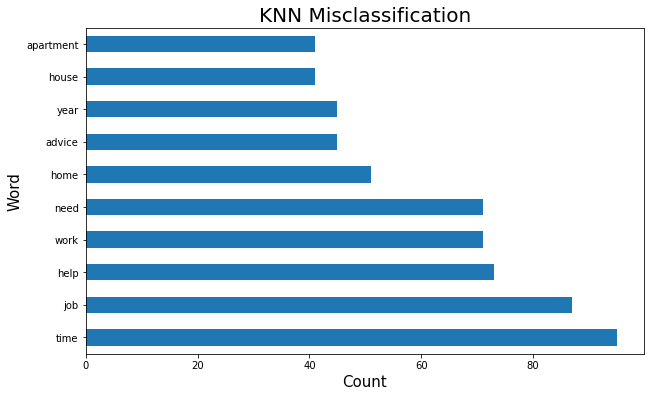

In [23]:
# Variable misclass_cvec as countvectorizer using my custom stopwords
misclass_cvec = CountVectorizer(stop_words = stops)
# Variable X set as whole_post column
X = knn_test_misclass['whole_post']
# Fit X on misclass_cvec
misclass_cvec.fit(X)
# X_trans variable as transformed X
X_trans = misclass_cvec.transform(X)

# Variable X_trans as a dataframe using .todense() and get_feature_names()
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=misclass_cvec.get_feature_names())

# Setting figure size
plt.figure(figsize = [10, 6])
# Visualizing common words using .sum() in descending order
X_trans.sum().sort_values(ascending = False).head(10).plot(kind='barh');

# Setting title for figure/vizualization
plt.title("KNN Misclassification", size = 20)
# Label for X axis
plt.xlabel("Count", size = 15)
# Label for y axis
plt.ylabel("Word", size = 15)

# Saving figure of misclassifications so that I can use in my 
plt.savefig("./images/misclassified_knn.png")